# Part1: Emotions & Images in Tweets
> The goal of this project is to mark detection from images posted along with tweets - Analysis 1

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/resnet50.png

## Approach
Working with pre-trained models: Resnet18, Resnet50


## Beyond the Text 
Beside the text, Twitter messages often include images, emojis or other special characters.
One approach to understand the overall sentiments from tweets is to work with each layer of information separately and then combining the analysis to reach a result that reflects all layers of the information.
This section will look at images separate from the text. Unpacking a way of analyzing images. 

## How to understand images?
We often understand a complex set of meaning from an image through a quick glance but what does it take for an automated system to understand the interplay of meaning in an image. There are multiple approaches in understanding an image. For instance, an image could be segregating into objects through image segmentation and using further meaning driven analysis a meaning of the image can be formed. 
But a holistic approach could prove beneficial too. Considering the multitude and complexities that are involved in making sense of images. The first approach here is use a pre-trained resnet model to identify emotions through images. 
The idea is that we could train a Machine Learning model with a set of images. After the initial training stage, the model should be able to identify the meaning of any new image that we get from tweets for instance.


## Project Goals
In this project, I’m looking to identify the overall reaction around a certain topic. One approach would be to identify tweets based on their underlying sentiment, such as anger, joy, sadness, etc. The first step is to find a dataset which includes images with their corresponding labels. This dataset can be used to train the initial model. 
Looking for such a dataset, I found [Emotion6] dataset from [Cornel University AMP lab] (http://chenlab.ece.cornell.edu/downloads.html).  Emotion6 is a collection of 1980 images and is divided into six categories of anger, disgust, fear, joy sadness, neutral .

## Citations
[1] Kuan-Chuan Peng, Amir Sadovnik, Andrew Gallagher, and Tsuhan Chen. "A Mixed Bag of Emotions: Model, Predict, and Transfer Emotion Distributions.", Computer Vision and Pattern Recognition (CVPR), 2015.

## 1- Preparing the notebook by loading the necessary libraries

In [6]:
import fastbook
import fastai
fastbook.setup_book()

In [7]:
from fastbook import *
from fastai.vision.widgets import *

In [8]:
from fastai.vision.data import ImageDataLoaders

In [9]:
fastai.__version__

'2.5.3'

## 2- Loading Data, Review Images

##### Data Source: Cornell Emotion6 Image Database
Link: http://chenlab.ece.cornell.edu/downloads.html

- 330 images in 6 categories of emotions
- 66 training & 264 in training

##### Training and Test Data - Folder Setup
All images are in Emotions6 are organized as follow:
emot_test/
&
emot_train/
    /anger
    /disgust
    /sadness
    /surprise
    /joy

    
##### Prediction Data from tweeter dataset
emot_pred/

### 1.a) the first step is to load the data

In [10]:
# Define the path to the images in the dataset

path = 'Data/Emotion6/Emotion6/'
fns = get_image_files(path)
fns


(#1980) [Path('Data/Emotion6/Emotion6/anger/1.jpg'),Path('Data/Emotion6/Emotion6/anger/10.jpg'),Path('Data/Emotion6/Emotion6/anger/100.jpg'),Path('Data/Emotion6/Emotion6/anger/101.jpg'),Path('Data/Emotion6/Emotion6/anger/102.jpg'),Path('Data/Emotion6/Emotion6/anger/103.jpg'),Path('Data/Emotion6/Emotion6/anger/104.jpg'),Path('Data/Emotion6/Emotion6/anger/105.jpg'),Path('Data/Emotion6/Emotion6/anger/106.jpg'),Path('Data/Emotion6/Emotion6/anger/107.jpg')...]

In [11]:
# Data Loader
# Define Data Loader using DataBlock API
# Images could be different sizes, item_tfms resize or squishes images to 128 squares

all_images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


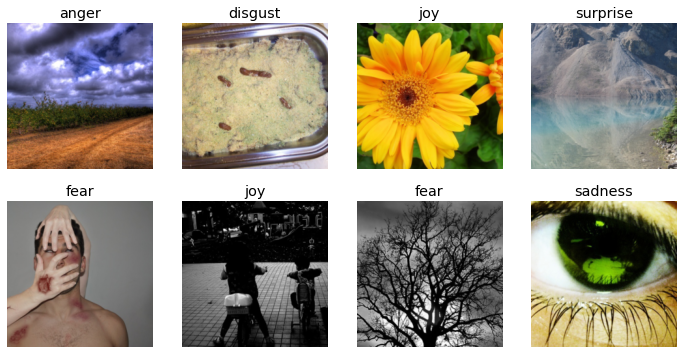

In [14]:
# Display some of the sample data
# Display some of the sample data
dls = all_images.dataloaders(path)
dls.show_batch(max_n=8, nrows=2)



## Train the model

In [15]:
# define image transformation and load the dataloader
emt_images = all_images.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = all_images.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\Sara\anaconda3\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


### Training with resnet18

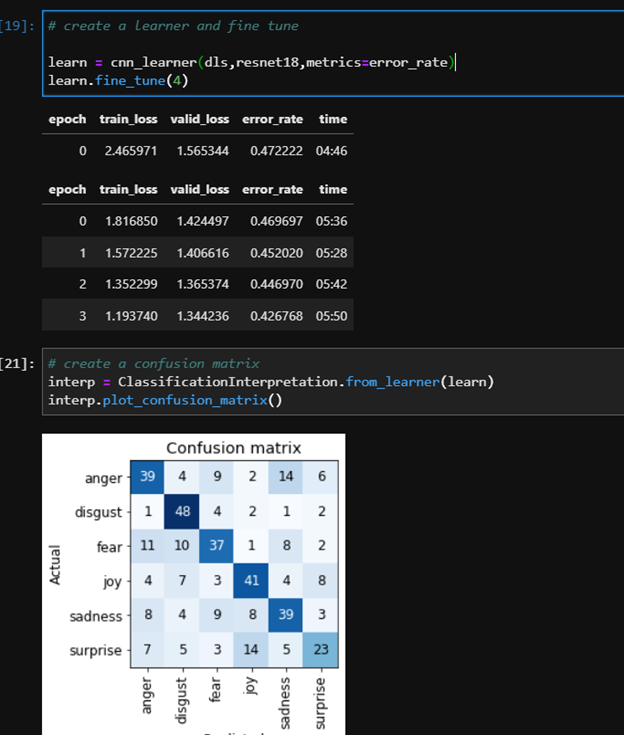

### Training with resnet50

In [37]:
# create a learner and fine tune

learn = cnn_learner(dls,resnet50,metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Sara/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.408922,1.727850,0.441919,13:00


epoch,train_loss,valid_loss,error_rate,time
0,1.670273,1.638344,0.477273,14:15
1,1.421620,1.598298,0.441919,13:36
2,1.163577,1.415981,0.429293,13:34
3,0.904251,1.400280,0.414141,13:51


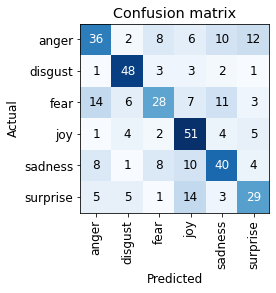

In [38]:
# create a confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

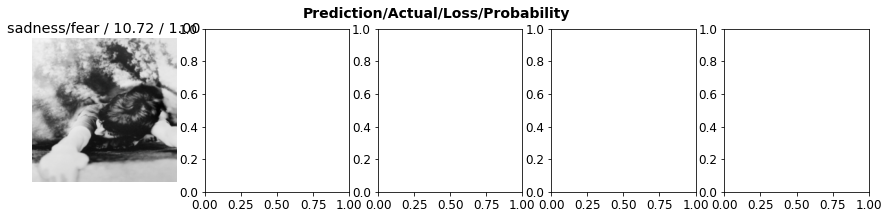

In [40]:
# plot top losses
# predictedAs/itShould have been/ High Confidence
interp.plot_top_losses(5,nrows=1)

In [24]:
#hide
# cleaning data
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [18]:
#hide 

#ImageClassifierCleaner - clean the data
# for idx in Cleaner.delete(): cleaner.fns[idx].unlink()
# for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx], pah/cat)

### Exporting the model pre-trained with 'resnet50'

In [25]:

# save the model
learn.export()


In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

### Doing Inference & getting predictions

In [60]:
# Using PILOW to display images
from PIL import Image
import matplotlib.pyplot as plt

### Example 1

In [57]:
# pass a file name and get prediction
learn_inf.predict('Data/Emotion6/images/emot_pred/67.jpg')


('fear',
 TensorBase(2),
 TensorBase([0.0493, 0.1292, 0.5153, 0.2096, 0.0195, 0.0770]))

In [44]:
## order of the dataloaders
learn_inf.dls.vocab


['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']

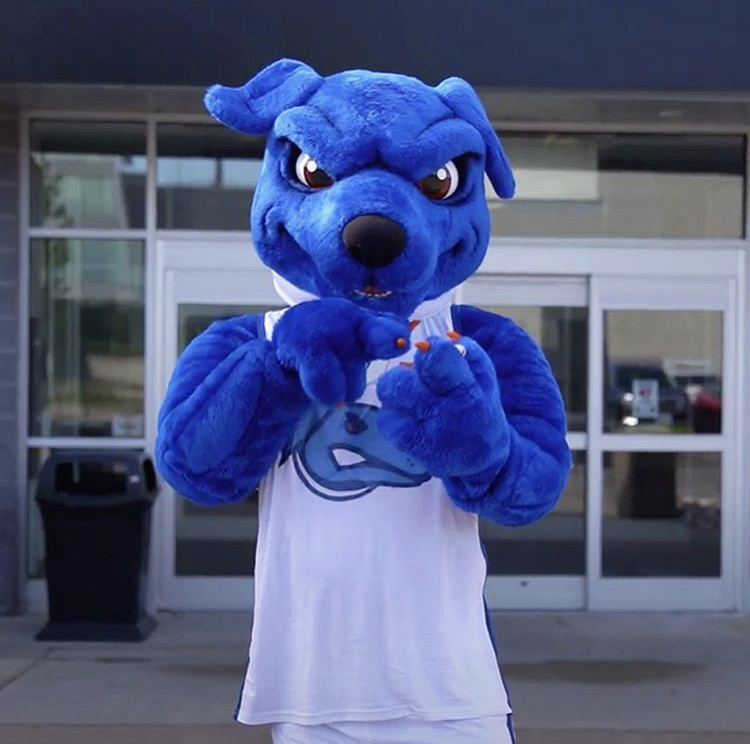

In [58]:
Image.open('Data/Emotion6/images/emot_pred/67.jpg')

### Example 2

In [61]:
# pass a file name and get prediction
learn_inf.predict('Data/Emotion6/images/emot_pred/68.jpg')

('joy',
 TensorBase(3),
 TensorBase([0.0542, 0.1107, 0.0052, 0.4411, 0.0032, 0.3856]))

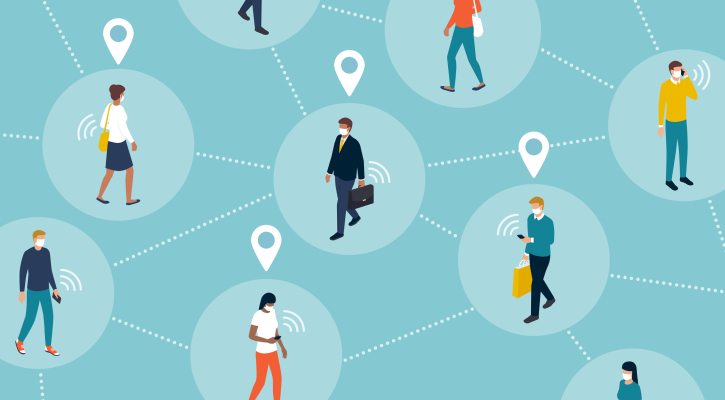

In [63]:
Image.open('Data/Emotion6/images/emot_pred/68.jpg')